In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [37]:

# Load CSV using correct encoding and header row
file_path = "pse-jpn-2024.csv"
df = pd.read_csv(file_path, encoding='shift_jis', header=3)

# Drop empty columns and rows without 'Description'
df = df.dropna(axis=1, how='all')
df = df[df['Description'].notna()]

# Preview data
df.head()

,Unnamed: 0,Unnamed: 1,Description,Formula / Source,Currency / Unit,1986,1987,1988,1989,1990,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
4,PSCT,III. Producer Single Commodity Transfers,"Includes Barley specific programmes in A, B, C...",A+B+C+D,JPY bn,52.41,50.47,52.82,43.92,37.98,...,14.24,15.78,15.31,14.63,15.43,13.63,15.45,12.77,10.7,9.5
6,NaN,A1. Market Price Support,MPS for Barley,TOTAL table,JPY bn,51.21,49.37,51.72,42.82,36.98,...,3.34,4.78,5.51,5.43,5.23,3.63,3.65,2.47,0.0,0.0
7,NaN,A2. Payments based on output,Barley specific programmes in A2,TOTAL table,JPY bn,1.20,1.10,1.10,1.10,1.00,...,10.90,11.00,9.80,9.20,10.20,10.00,11.80,10.30,10.7,9.5
9,NaN,B1. Variable input use,Barley specific programmes in B1,TOTAL table,JPY bn,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
10,NaN,B2. Fixed capital formation,Barley specific programmes in B2,TOTAL table,JPY bn,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [38]:
# Set Description as index and extract year columns
df.set_index('Description', inplace=True)
year_columns = df.columns[df.columns.str.match(r'^\d{4}$')]

# Clean commas and convert to numeric
df_years = df[year_columns].replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')

# Transpose for plotting
df_plot = df_years.T
df_plot.index = df_plot.index.astype(int)

df_plot.head()

Description,"Includes Barley specific programmes in A, B, C and D",MPS for Barley,Barley specific programmes in A2,Barley specific programmes in B1,Barley specific programmes in B2,Barley specific programmes in B3,Barley specific programmes in C,Barley specific programmes in D,Barley specific transfers / value of receipts from Barley production
1986,52.41,51.21,1.2,0.0,0.0,0.0,0.0,0.0,84.64
1987,50.47,49.37,1.1,0.0,0.0,0.0,0.0,0.0,84.90
1988,52.82,51.72,1.1,0.0,0.0,0.0,0.0,0.0,82.64
1989,43.92,42.82,1.1,0.0,0.0,0.0,0.0,0.0,77.24
1990,37.98,36.98,1.0,0.0,0.0,0.0,0.0,0.0,73.96


In [39]:
df_plot.columns.tolist()


['Includes Barley specific programmes in A, B, C and D',
 'MPS for Barley',
 'Barley specific programmes in A2',
 'Barley specific programmes in B1',
 'Barley specific programmes in B2',
 'Barley specific programmes in B3',
 'Barley specific programmes in C',
 'Barley specific programmes in D',
 'Barley specific transfers  / value of receipts from Barley production']

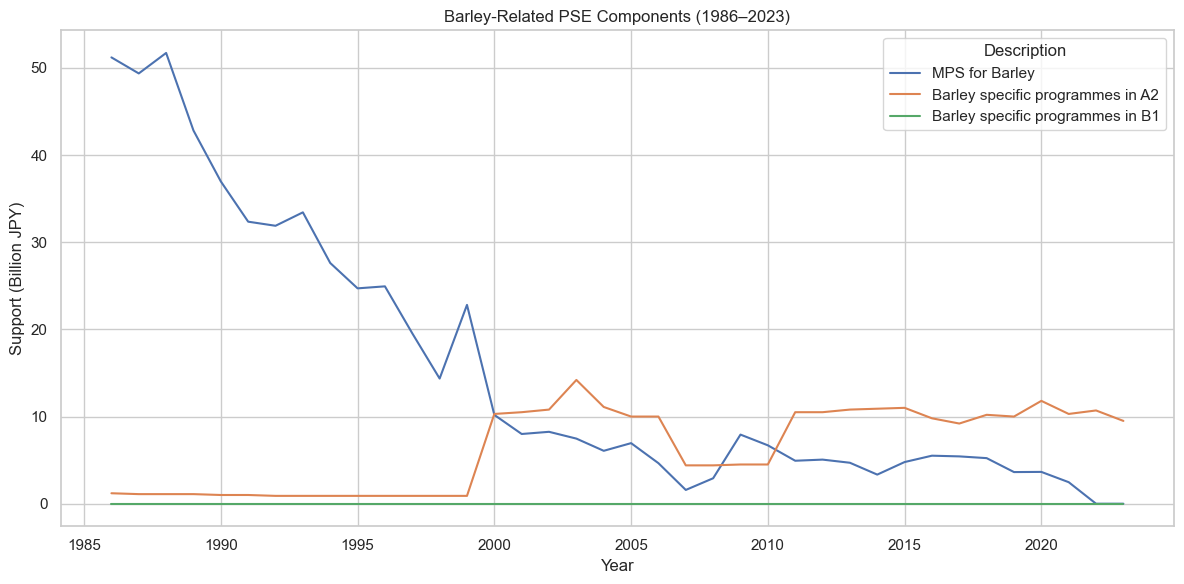

In [40]:
selected = [
    'MPS for Barley',
    'Barley specific programmes in A2',
    'Barley specific programmes in B1'
]

df_plot[selected].plot(title='Barley-Related PSE Components (1986–2023)')
plt.ylabel("Support (Billion JPY)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()
